<a href="https://colab.research.google.com/github/davidxu90/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module1-exploratory-data-analysis/LS_DS_112_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [1]:
import pandas as pd

pd.set_option("display.max_rows", 150)
pd.set_option("display.max_columns", 100)

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [3]:
df["BedroomAbvGr"]

0       3
1       3
2       3
3       3
4       4
       ..
1455    3
1456    3
1457    4
1458    2
1459    3
Name: BedroomAbvGr, Length: 1460, dtype: int64

In [4]:
df["LotFrontage"]

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [5]:
df["LotFrontage"].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
82.0      12
40.0      12
43.0      12
67.0      12
57.0      12
69.0      11
76.0      11
86.0      10
53.0      10
34.0      10
92.0      10
88.0      10
62.0       9
44.0       9
84.0       9
77.0       9
35.0       9
93.0       8
61.0       8
98.0       8
96.0       8
107.0      7
120.0      7
95.0       7
58.0       7
41.0       6
30.0       6
81.0       6
89.0       6
105.0      6
48.0       6
110.0      6
94.0       6
54.0       6
91.0       6
36.0       6
47.0       5
37.0       5
83.0       5
56.0       5
87.0       5
32.0       5
42.0       4
49.0       4
102.0      4
103.0      3
108.0      3
99.0       3
104.0      3
45.0       3
130.0      3
174.0      2

In [6]:
df["LotFrontage"].value_counts(dropna = False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
67.0      12
57.0      12
82.0      12
43.0      12
40.0      12
76.0      11
69.0      11
53.0      10
92.0      10
88.0      10
34.0      10
86.0      10
77.0       9
35.0       9
44.0       9
84.0       9
62.0       9
93.0       8
61.0       8
98.0       8
96.0       8
107.0      7
95.0       7
120.0      7
58.0       7
41.0       6
105.0      6
54.0       6
94.0       6
48.0       6
110.0      6
30.0       6
89.0       6
81.0       6
91.0       6
36.0       6
47.0       5
83.0       5
37.0       5
87.0       5
32.0       5
56.0       5
102.0      4
42.0       4
49.0       4
99.0       3
45.0       3
104.0      3
130.0      3
103.0      3
108.0      3

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
import numpy as np

df['Id'][0] = np.NaN
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,NaN,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2.0,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3.0,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4.0,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5.0,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
df.dtypes

Id               float64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [10]:
df.isnull().sum()

Id                  1
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [11]:
small_df = df[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'SalePrice']].copy()

small_df.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
0,856,856,854,208500
1,1262,1262,0,181500
2,920,920,866,223500
3,756,961,756,140000
4,1145,1145,1053,250000


In [12]:
small_df['TotalSquareFootage'] = small_df['TotalBsmtSF'] + small_df['1stFlrSF'] + small_df['2ndFlrSF']

small_df.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage
0,856,856,854,208500,2566
1,1262,1262,0,181500,2524
2,920,920,866,223500,2706
3,756,961,756,140000,2473
4,1145,1145,1053,250000,3343


In [13]:
small_df['price_per_square_ft'] = small_df['SalePrice'] / small_df['TotalSquareFootage']

small_df.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage,price_per_square_ft
0,856,856,854,208500,2566,81.254871
1,1262,1262,0,181500,2524,71.909667
2,920,920,866,223500,2706,82.594235
3,756,961,756,140000,2473,56.611403
4,1145,1145,1053,250000,3343,74.783129


In [14]:
small_df['TotalBsmtSF']

0        856
1       1262
2        920
3        756
4       1145
        ... 
1455     953
1456    1542
1457    1152
1458    1078
1459    1256
Name: TotalBsmtSF, Length: 1460, dtype: int64

In [15]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
!unzip LoanStats_2018Q4.csv.zip

df = pd.read_csv('LoanStats_2018Q4.csv', header=1)

df.head()

--2020-07-08 03:26:30--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 34.213.98.158, 54.149.64.5, 35.166.36.92, ...
Connecting to resources.lendingclub.com (resources.lendingclub.com)|34.213.98.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip.4’

LoanStats_2018Q4.cs     [            <=>     ]  22.21M  1.97MB/s    in 11s     

2020-07-08 03:26:43 (1.95 MB/s) - ‘LoanStats_2018Q4.csv.zip.4’ saved [23289953]

Archive:  LoanStats_2018Q4.csv.zip
replace LoanStats_2018Q4.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: LoanStats_2018Q4.csv    


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,18000.0,18000.0,18000.0,36 months,8.81%,570.81,A,A5,Sever,< 1 year,RENT,40000.0,Source Verified,Dec-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,100xx,NY,12.81,0.0,Apr-2014,0.0,NaN,NaN,15.0,0.0,16147.0,35.2%,21.0,w,0.00,0.00,6265.690000,6265.69,5136.86,1128.83,0.0,0.0,0.0,Oct-2019,570.81,NaN,May-2020,0.0,...,4.0,11.0,15.0,6.0,15.0,0.0,0.0,0.0,4.0,100.0,12.5,0.0,0.0,60900.0,28062.0,35800.0,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,18500.0,18500.0,18500.0,60 months,12.98%,420.75,B,B5,Supply Chain Analyst,5 years,RENT,96500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,554xx,MN,27.86,1.0,May-2009,0.0,7.0,NaN,19.0,0.0,19000.0,62.1%,38.0,w,14135.68,14135.68,7553.490000,7553.49,4364.32,3189.17,0.0,0.0,0.0,Jun-2020,420.75,Jul-2020,Jun-2020,0.0,...,28.0,5.0,10.0,5.0,19.0,0.0,0.0,0.0,0.0,97.3,66.7,0.0,0.0,131337.0,81660.0,22900.0,100737.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,32000.0,32000.0,32000.0,60 months,14.47%,752.41,C,C2,Teacher,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,home_improvement,Home improvement,152xx,PA,26.11,0.0,Oct-2000,0.0,24.0,NaN,18.0,0.0,14833.0,43%,32.0,w,26017.15,26017.15,11247.560000,11247.56,5982.85,5264.71,0.0,0.0,0.0,May-2020,0.00,Jul-2020,Jun-2020,0.0,...,15.0,13.0,16.0,11.0,18.0,0.0,0.0,0.0,3.0,77.4,12.5,0.0,0.0,94609.0,73873.0,26800.0,60109.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,CVD19SKIP,INCOMECURT,COMPLETE,2.0,0.0,Apr-2020,Jun-2020,Apr-2020,2.0,0.0,ACTIVE,627.45,26278.58,752.41,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,5000.0,5000.0,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0.0,Apr-2011,0.0,NaN,NaN,8.0,0.0,4599.0,19.1%,13.0,w,0.00,0.00,5637.052785,5637.05,5000.00,622.05,15.0,0.0,0.0,Oct-2019,4741.09,NaN,Jun-2020,0.0,...,4.0,6.0,7.0,3.0,8.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,13000.0,13000.0,13000.0,36 months,23.40%,505.95,E,E1,Sale Represe

In [16]:
df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1)

print(df.shape)
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(128414, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,18000.0,18000.0,18000.0,36 months,8.81%,570.81,A,A5,Sever,< 1 year,RENT,40000.0,Source Verified,Dec-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,100xx,NY,12.81,0.0,Apr-2014,0.0,NaN,NaN,15.0,0.0,16147.0,35.2%,21.0,w,0.00,0.00,6265.690000,6265.69,5136.86,1128.83,0.0,0.0,0.0,Oct-2019,570.81,NaN,May-2020,0.0,...,4.0,11.0,15.0,6.0,15.0,0.0,0.0,0.0,4.0,100.0,12.5,0.0,0.0,60900.0,28062.0,35800.0,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,18500.0,18500.0,18500.0,60 months,12.98%,420.75,B,B5,Supply Chain Analyst,5 years,RENT,96500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,554xx,MN,27.86,1.0,May-2009,0.0,7.0,NaN,19.0,0.0,19000.0,62.1%,38.0,w,14135.68,14135.68,7553.490000,7553.49,4364.32,3189.17,0.0,0.0,0.0,Jun-2020,420.75,Jul-2020,Jun-2020,0.0,...,28.0,5.0,10.0,5.0,19.0,0.0,0.0,0.0,0.0,97.3,66.7,0.0,0.0,131337.0,81660.0,22900.0,100737.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,32000.0,32000.0,32000.0,60 months,14.47%,752.41,C,C2,Teacher,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,home_improvement,Home improvement,152xx,PA,26.11,0.0,Oct-2000,0.0,24.0,NaN,18.0,0.0,14833.0,43%,32.0,w,26017.15,26017.15,11247.560000,11247.56,5982.85,5264.71,0.0,0.0,0.0,May-2020,0.00,Jul-2020,Jun-2020,0.0,...,15.0,13.0,16.0,11.0,18.0,0.0,0.0,0.0,3.0,77.4,12.5,0.0,0.0,94609.0,73873.0,26800.0,60109.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,CVD19SKIP,INCOMECURT,COMPLETE,2.0,0.0,Apr-2020,Jun-2020,Apr-2020,2.0,0.0,ACTIVE,627.45,26278.58,752.41,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,5000.0,5000.0,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0.0,Apr-2011,0.0,NaN,NaN,8.0,0.0,4599.0,19.1%,13.0,w,0.00,0.00,5637.052785,5637.05,5000.00,622.05,15.0,0.0,0.0,Oct-2019,4741.09,NaN,Jun-2020,0.0,...,4.0,6.0,7.0,3.0,8.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,13000.0,13000.0,13000.0,36 months,23.40%,505.95,E,E1,Sale Represe

In [17]:
df.isnull().sum().sort_values()

inq_fi                                             2
mo_sin_old_rev_tl_op                               2
delinq_amnt                                        2
chargeoff_within_12_mths                           2
acc_open_past_24mths                               2
inq_last_12m                                       2
total_cu_tl                                        2
total_rev_hi_lim                                   2
open_rv_24m                                        2
open_rv_12m                                        2
total_bal_il                                       2
open_il_24m                                        2
open_il_12m                                        2
open_act_il                                        2
open_acc_6m                                        2
tot_cur_bal                                        2
tot_coll_amt                                       2
acc_now_delinq                                     2
application_type                              

In [18]:
df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1, skipfooter=2)

print(df.shape)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


(128412, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,18000,18000,18000.0,36 months,8.81%,570.81,A,A5,Sever,< 1 year,RENT,40000.0,Source Verified,Dec-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,100xx,NY,12.81,0,Apr-2014,0,NaN,NaN,15,0,16147,35.2%,21,w,0.00,0.00,6265.690000,6265.69,5136.86,1128.83,0.0,0.0,0.0,Oct-2019,570.81,NaN,May-2020,0,...,4,11,15,6,15,0.0,0,0,4,100.0,12.5,0,0,60900,28062,35800,15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,18500,18500,18500.0,60 months,12.98%,420.75,B,B5,Supply Chain Analyst,5 years,RENT,96500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,554xx,MN,27.86,1,May-2009,0,7.0,NaN,19,0,19000,62.1%,38,w,14135.68,14135.68,7553.490000,7553.49,4364.32,3189.17,0.0,0.0,0.0,Jun-2020,420.75,Jul-2020,Jun-2020,0,...,28,5,10,5,19,0.0,0,0,0,97.3,66.7,0,0,131337,81660,22900,100737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,32000,32000,32000.0,60 months,14.47%,752.41,C,C2,Teacher,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,home_improvement,Home improvement,152xx,PA,26.11,0,Oct-2000,0,24.0,NaN,18,0,14833,43%,32,w,26017.15,26017.15,11247.560000,11247.56,5982.85,5264.71,0.0,0.0,0.0,May-2020,0.00,Jul-2020,Jun-2020,0,...,15,13,16,11,18,0.0,0,0,3,77.4,12.5,0,0,94609,73873,26800,60109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,CVD19SKIP,INCOMECURT,COMPLETE,2.0,0.0,Apr-2020,Jun-2020,Apr-2020,2.0,0.0,ACTIVE,627.45,26278.58,752.41,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,0.00,0.00,5637.052785,5637.05,5000.00,622.05,15.0,0.0,0.0,Oct-2019,4741.09,NaN,Jun-2020,0,...,4,6,7,3,8,0.0,0,0,0,100.0,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,13000,13000,13000.0,36 months,23.40%,505.95,E,E1,Sale Representative,2 years,MORTGAGE,90000.0,Verified,Dec-2018,Current,n,NaN,NaN,other,Other,191xx,PA,39.73,0,May-2007,0,NaN,NaN,14,0,52013,83.1%,20,w,8968.74,8968.74,7057.950000,7057.95,4031.26,3026.

In [19]:
df.isnull().sum().sort_values()

inq_fi                                             0
mo_sin_old_rev_tl_op                               0
delinq_amnt                                        0
chargeoff_within_12_mths                           0
acc_open_past_24mths                               0
inq_last_12m                                       0
total_cu_tl                                        0
total_rev_hi_lim                                   0
open_rv_24m                                        0
open_rv_12m                                        0
total_bal_il                                       0
open_il_24m                                        0
open_il_12m                                        0
open_act_il                                        0
open_acc_6m                                        0
tot_cur_bal                                        0
tot_coll_amt                                       0
acc_now_delinq                                     0
application_type                              

In [20]:
df1 = df.drop(['desc', 'url', 'member_id', 'id'], axis=1)

df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,18000,18000,18000.0,36 months,8.81%,570.81,A,A5,Sever,< 1 year,RENT,40000.0,Source Verified,Dec-2018,Charged Off,n,debt_consolidation,Debt consolidation,100xx,NY,12.81,0,Apr-2014,0,NaN,NaN,15,0,16147,35.2%,21,w,0.00,0.00,6265.690000,6265.69,5136.86,1128.83,0.0,0.0,0.0,Oct-2019,570.81,NaN,May-2020,0,NaN,1,Individual,NaN,...,4,11,15,6,15,0.0,0,0,4,100.0,12.5,0,0,60900,28062,35800,15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,18500,18500,18500.0,60 months,12.98%,420.75,B,B5,Supply Chain Analyst,5 years,RENT,96500.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,554xx,MN,27.86,1,May-2009,0,7.0,NaN,19,0,19000,62.1%,38,w,14135.68,14135.68,7553.490000,7553.49,4364.32,3189.17,0.0,0.0,0.0,Jun-2020,420.75,Jul-2020,Jun-2020,0,NaN,1,Individual,NaN,...,28,5,10,5,19,0.0,0,0,0,97.3,66.7,0,0,131337,81660,22900,100737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,32000,32000,32000.0,60 months,14.47%,752.41,C,C2,Teacher,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2018,Current,n,home_improvement,Home improvement,152xx,PA,26.11,0,Oct-2000,0,24.0,NaN,18,0,14833,43%,32,w,26017.15,26017.15,11247.560000,11247.56,5982.85,5264.71,0.0,0.0,0.0,May-2020,0.00,Jul-2020,Jun-2020,0,41.0,1,Individual,NaN,...,15,13,16,11,18,0.0,0,0,3,77.4,12.5,0,0,94609,73873,26800,60109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,CVD19SKIP,INCOMECURT,COMPLETE,2.0,0.0,Apr-2020,Jun-2020,Apr-2020,2.0,0.0,ACTIVE,627.45,26278.58,752.41,N,NaN,NaN,NaN,NaN,NaN,NaN
3,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,0.00,0.00,5637.052785,5637.05,5000.00,622.05,15.0,0.0,0.0,Oct-2019,4741.09,NaN,Jun-2020,0,NaN,1,Individual,NaN,...,4,6,7,3,8,0.0,0,0,0,100.0,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,13000,13000,13000.0,36 months,23.40%,505.95,E,E1,Sale Representative,2 years,MORTGAGE,90000.0,Verified,Dec-2018,Current,n,other,Other,191xx,PA,39.73,0,May-2007,0,NaN,NaN,14,0,52013,83.

In [21]:
df['int_rate'].head(10)

0      8.81%
1     12.98%
2     14.47%
3     17.97%
4     23.40%
5     26.31%
6     19.92%
7     23.40%
8     23.40%
9     11.80%
Name: int_rate, dtype: object

In [22]:
df['int_rate'][0]

'  8.81%'

In [23]:
df['int_rate'][1]

' 12.98%'

In [24]:
def int_rate_to_float(int_rate):
  return float(int_rate.strip().strip('%'))

cleaned_int_rates = []

for int_rate in df['int_rate']:
  cleaned_int_rates.append(int_rate_to_float(int_rate))

df['int_rate_cleaned'] = pd.Series(cleaned_int_rates)

df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_cleaned
0,NaN,NaN,18000,18000,18000.0,36 months,8.81%,570.81,A,A5,Sever,< 1 year,RENT,40000.0,Source Verified,Dec-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,100xx,NY,12.81,0,Apr-2014,0,NaN,NaN,15,0,16147,35.2%,21,w,0.00,0.00,6265.690000,6265.69,5136.86,1128.83,0.0,0.0,0.0,Oct-2019,570.81,NaN,May-2020,0,...,11,15,6,15,0.0,0,0,4,100.0,12.5,0,0,60900,28062,35800,15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,8.81
1,NaN,NaN,18500,18500,18500.0,60 months,12.98%,420.75,B,B5,Supply Chain Analyst,5 years,RENT,96500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,554xx,MN,27.86,1,May-2009,0,7.0,NaN,19,0,19000,62.1%,38,w,14135.68,14135.68,7553.490000,7553.49,4364.32,3189.17,0.0,0.0,0.0,Jun-2020,420.75,Jul-2020,Jun-2020,0,...,5,10,5,19,0.0,0,0,0,97.3,66.7,0,0,131337,81660,22900,100737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,12.98
2,NaN,NaN,32000,32000,32000.0,60 months,14.47%,752.41,C,C2,Teacher,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,home_improvement,Home improvement,152xx,PA,26.11,0,Oct-2000,0,24.0,NaN,18,0,14833,43%,32,w,26017.15,26017.15,11247.560000,11247.56,5982.85,5264.71,0.0,0.0,0.0,May-2020,0.00,Jul-2020,Jun-2020,0,...,13,16,11,18,0.0,0,0,3,77.4,12.5,0,0,94609,73873,26800,60109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,CVD19SKIP,INCOMECURT,COMPLETE,2.0,0.0,Apr-2020,Jun-2020,Apr-2020,2.0,0.0,ACTIVE,627.45,26278.58,752.41,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47
3,NaN,NaN,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,0.00,0.00,5637.052785,5637.05,5000.00,622.05,15.0,0.0,0.0,Oct-2019,4741.09,NaN,Jun-2020,0,...,6,7,3,8,0.0,0,0,0,100.0,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,17.97
4,NaN,NaN,13000,13000,13000.0,36 months,23.40%,505.95,E,E1,Sale Representative,2 years,MORTGAGE,90000.0,Verified,Dec-2018,Current,n,NaN,NaN,other,Other,191xx,PA,39.73,0,May-2007,0,NaN,NaN,14,0,52013,83.1%,20,w,8968.74,8968.74,7057.950000,7

In [25]:
df['int_rate_2'] = df['int_rate'].apply(int_rate_to_float)

In [26]:
df['emp_title'].value_counts(dropna=False).head(20)

NaN                   20947
Teacher                2090
Manager                1773
Registered Nurse        952
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Operations Manager      387
Truck Driver            387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

In [27]:
examples = ['owner', 'Supervisor', ' Project Manager', np.NaN]

def clean_emp_title(title):
  if isinstance(title, str):
    return title.strip().title()
  else:
    return "Unknown"

[clean_emp_title(title) for title in examples]
df['emp_title'].value_counts().head(20)

Teacher                     2090
Manager                     1773
Registered Nurse             952
Driver                       924
RN                           726
Supervisor                   697
Sales                        580
Project Manager              526
General Manager              523
Office Manager               521
Owner                        420
Director                     402
Operations Manager           387
Truck Driver                 387
Nurse                        326
Engineer                     325
Sales Manager                304
manager                      301
Supervisor                   270
Administrative Assistant     269
Name: emp_title, dtype: int64

In [28]:
[col for col in df if col.endswith('_d')]

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

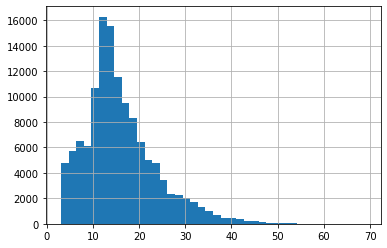

In [29]:
df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month

df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], infer_datetime_format=True)
(df['issue_d'] - df['earliest_cr_line']).dt.days / 365

df['credit_length'] = (df['issue_d'] - df['earliest_cr_line']).dt.days / 365

df['credit_length'].hist(bins=40);

In [30]:
def convert_term_to_num(s):
   return s.split()[0]

df["term"] = pd.to_numeric([convert_term_to_num(term) for term in df["term"]])
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_cleaned,int_rate_2,issue_year,issue_month,credit_length
0,NaN,NaN,18000,18000,18000.0,36,8.81%,570.81,A,A5,Sever,< 1 year,RENT,40000.0,Source Verified,2018-12-01,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,100xx,NY,12.81,0,2014-04-01,0,NaN,NaN,15,0,16147,35.2%,21,w,0.00,0.00,6265.690000,6265.69,5136.86,1128.83,0.0,0.0,0.0,Oct-2019,570.81,NaN,May-2020,0,...,0.0,0,0,4,100.0,12.5,0,0,60900,28062,35800,15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,8.81,8.81,2018,12,4.671233
1,NaN,NaN,18500,18500,18500.0,60,12.98%,420.75,B,B5,Supply Chain Analyst,5 years,RENT,96500.0,Source Verified,2018-12-01,Current,n,NaN,NaN,credit_card,Credit card refinancing,554xx,MN,27.86,1,2009-05-01,0,7.0,NaN,19,0,19000,62.1%,38,w,14135.68,14135.68,7553.490000,7553.49,4364.32,3189.17,0.0,0.0,0.0,Jun-2020,420.75,Jul-2020,Jun-2020,0,...,0.0,0,0,0,97.3,66.7,0,0,131337,81660,22900,100737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,12.98,12.98,2018,12,9.591781
2,NaN,NaN,32000,32000,32000.0,60,14.47%,752.41,C,C2,Teacher,10+ years,MORTGAGE,110000.0,Source Verified,2018-12-01,Current,n,NaN,NaN,home_improvement,Home improvement,152xx,PA,26.11,0,2000-10-01,0,24.0,NaN,18,0,14833,43%,32,w,26017.15,26017.15,11247.560000,11247.56,5982.85,5264.71,0.0,0.0,0.0,May-2020,0.00,Jul-2020,Jun-2020,0,...,0.0,0,0,3,77.4,12.5,0,0,94609,73873,26800,60109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,CVD19SKIP,INCOMECURT,COMPLETE,2.0,0.0,Apr-2020,Jun-2020,Apr-2020,2.0,0.0,ACTIVE,627.45,26278.58,752.41,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,14.47,2018,12,18.178082
3,NaN,NaN,5000,5000,5000.0,36,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,2018-12-01,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,2011-04-01,0,NaN,NaN,8,0,4599,19.1%,13,w,0.00,0.00,5637.052785,5637.05,5000.00,622.05,15.0,0.0,0.0,Oct-2019,4741.09,NaN,Jun-2020,0,...,0.0,0,0,0,100.0,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,17.97,17.97,2018,12,7.673973
4,NaN,NaN,13000,13000,13000.0,36,23.40%,505.95,E,E1,Sale Representative,2 years,MORTGAGE,90000.0,Verified,2018-12-01,Current,n,NaN,NaN,other,Other,191xx,PA,39.73,0,2007-05-01,0,NaN,NaN,14,0,52013,83.1%,20,w,89

In [31]:
df["loan_status_is_great"] = pd.to_numeric([status == "Current" or status == "Fully Paid" for status in df["loan_status"]])
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_cleaned,int_rate_2,issue_year,issue_month,credit_length,loan_status_is_great
0,NaN,NaN,18000,18000,18000.0,36,8.81%,570.81,A,A5,Sever,< 1 year,RENT,40000.0,Source Verified,2018-12-01,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,100xx,NY,12.81,0,2014-04-01,0,NaN,NaN,15,0,16147,35.2%,21,w,0.00,0.00,6265.690000,6265.69,5136.86,1128.83,0.0,0.0,0.0,Oct-2019,570.81,NaN,May-2020,0,...,0,0,4,100.0,12.5,0,0,60900,28062,35800,15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,8.81,8.81,2018,12,4.671233,False
1,NaN,NaN,18500,18500,18500.0,60,12.98%,420.75,B,B5,Supply Chain Analyst,5 years,RENT,96500.0,Source Verified,2018-12-01,Current,n,NaN,NaN,credit_card,Credit card refinancing,554xx,MN,27.86,1,2009-05-01,0,7.0,NaN,19,0,19000,62.1%,38,w,14135.68,14135.68,7553.490000,7553.49,4364.32,3189.17,0.0,0.0,0.0,Jun-2020,420.75,Jul-2020,Jun-2020,0,...,0,0,0,97.3,66.7,0,0,131337,81660,22900,100737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,12.98,12.98,2018,12,9.591781,True
2,NaN,NaN,32000,32000,32000.0,60,14.47%,752.41,C,C2,Teacher,10+ years,MORTGAGE,110000.0,Source Verified,2018-12-01,Current,n,NaN,NaN,home_improvement,Home improvement,152xx,PA,26.11,0,2000-10-01,0,24.0,NaN,18,0,14833,43%,32,w,26017.15,26017.15,11247.560000,11247.56,5982.85,5264.71,0.0,0.0,0.0,May-2020,0.00,Jul-2020,Jun-2020,0,...,0,0,3,77.4,12.5,0,0,94609,73873,26800,60109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,CVD19SKIP,INCOMECURT,COMPLETE,2.0,0.0,Apr-2020,Jun-2020,Apr-2020,2.0,0.0,ACTIVE,627.45,26278.58,752.41,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,14.47,2018,12,18.178082,True
3,NaN,NaN,5000,5000,5000.0,36,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,2018-12-01,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,2011-04-01,0,NaN,NaN,8,0,4599,19.1%,13,w,0.00,0.00,5637.052785,5637.05,5000.00,622.05,15.0,0.0,0.0,Oct-2019,4741.09,NaN,Jun-2020,0,...,0,0,0,100.0,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,17.97,17.97,2018,12,7.673973,True
4,NaN,NaN,13000,13000,13000.0,36,23.40%,505.95,E,E1,Sale Representative,2 years,MORTGAGE,90000.0,Verified,2018-12-01,Current,n,NaN,NaN,other,Other,191xx,PA,39.73,0,2007-05-01,0,NaN,NaN,14,0,52013,83.1

In [32]:
df['last_pymnt_d_month'] = pd.to_datetime(df['last_pymnt_d'], infer_datetime_format=True).dt.month
df['last_pymnt_d_year'] = pd.to_datetime(df['last_pymnt_d'], infer_datetime_format=True).dt.year
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_cleaned,int_rate_2,issue_year,issue_month,credit_length,loan_status_is_great,last_pymnt_d_month,last_pymnt_d_year
0,NaN,NaN,18000,18000,18000.0,36,8.81%,570.81,A,A5,Sever,< 1 year,RENT,40000.0,Source Verified,2018-12-01,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,100xx,NY,12.81,0,2014-04-01,0,NaN,NaN,15,0,16147,35.2%,21,w,0.00,0.00,6265.690000,6265.69,5136.86,1128.83,0.0,0.0,0.0,Oct-2019,570.81,NaN,May-2020,0,...,4,100.0,12.5,0,0,60900,28062,35800,15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,8.81,8.81,2018,12,4.671233,False,10.0,2019.0
1,NaN,NaN,18500,18500,18500.0,60,12.98%,420.75,B,B5,Supply Chain Analyst,5 years,RENT,96500.0,Source Verified,2018-12-01,Current,n,NaN,NaN,credit_card,Credit card refinancing,554xx,MN,27.86,1,2009-05-01,0,7.0,NaN,19,0,19000,62.1%,38,w,14135.68,14135.68,7553.490000,7553.49,4364.32,3189.17,0.0,0.0,0.0,Jun-2020,420.75,Jul-2020,Jun-2020,0,...,0,97.3,66.7,0,0,131337,81660,22900,100737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,12.98,12.98,2018,12,9.591781,True,6.0,2020.0
2,NaN,NaN,32000,32000,32000.0,60,14.47%,752.41,C,C2,Teacher,10+ years,MORTGAGE,110000.0,Source Verified,2018-12-01,Current,n,NaN,NaN,home_improvement,Home improvement,152xx,PA,26.11,0,2000-10-01,0,24.0,NaN,18,0,14833,43%,32,w,26017.15,26017.15,11247.560000,11247.56,5982.85,5264.71,0.0,0.0,0.0,May-2020,0.00,Jul-2020,Jun-2020,0,...,3,77.4,12.5,0,0,94609,73873,26800,60109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,CVD19SKIP,INCOMECURT,COMPLETE,2.0,0.0,Apr-2020,Jun-2020,Apr-2020,2.0,0.0,ACTIVE,627.45,26278.58,752.41,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,14.47,2018,12,18.178082,True,5.0,2020.0
3,NaN,NaN,5000,5000,5000.0,36,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,2018-12-01,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,2011-04-01,0,NaN,NaN,8,0,4599,19.1%,13,w,0.00,0.00,5637.052785,5637.05,5000.00,622.05,15.0,0.0,0.0,Oct-2019,4741.09,NaN,Jun-2020,0,...,0,100.0,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,17.97,17.97,2018,12,7.673973,True,10.0,2019.0
4,NaN,NaN,13000,13000,13000.0,36,23.40%,505.95,E,E1,Sale Representative,2 years,MORTGAGE,90000.0,Verified,2018-12-01,Current,n,NaN,NaN,other,Other,191xx,PA,39.73,0,2

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [33]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-07-08 03:27:11--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.17.110
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.17.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.1’

instacart_online_gr 100%[===================>] 196.03M  54.5MB/s    in 3.8s    

2020-07-08 03:27:15 (52.2 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.1’ saved [205548478/205548478]



In [34]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [35]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01
